In [ ]:
#default_exp data

In [ ]:
%matplotlib inline

# Data

>wrappers for timeseries data

This module provides 

In [ ]:
#export
import numpy as np
import torch

from fastai.torch_basics import *
from fastai.data.all import *

### TS foundations

In [ ]:
#hide
# legacy function
def show_ts(ts):
    '''
    plot a timeseries, one ax for each channel
    '''
    print('show_ts')
    ts=ts.to('cpu')
#     if ts.ndim==3: ts=ts[0]  #
    assert ts.ndim == 2
    nrows = math.ceil(ts.shape[0]/2)
    ncols = 1 if ts.shape[0]<=1 else 2
    fg, axs = plt.subplots(nrows,ncols, figsize=(5,5))
    for i, ax in enumerate(fg.axes):
    #     print(ax)
    #     ax.set_title(str(i))
        ax.plot(ts[i])
    return fg

In [ ]:
#export
def plot_ts(x, ax=None, title=None, **kwargs):
    '''
    plot a 2D tensor representing a timeseries
    '''
    x = x.clone().to('cpu')
    print(x.device)
    if ax is None:
#             plt.plot(x.data.transpose_(0, 1))
        plt.plot(x.transpose_(0,1))

        plt.title(title)
        plt.show()
    else:
        ax.plot(x.transpose_(0, 1))
        ax.title.set_text(title)
        ax.tick_params(
            axis='both',
            which='both',
            bottom='off',
            top='off',
            labelbottom='off',
            right='off',
            left='off',
            labelleft='off')
        return ax


In [ ]:
#export
class TSItem:
    def __init__(self, data):
        '''
        basic item wrapper for 2D tensor representing a timeseries
        '''
        assert len(data.shape)==2; 'not a 2D tensor'
        self.data = data
        self.channels, self.seq_len = data.shape
        
    def show(self, ctx=None):
        return plot_ts(self.data)

# def show_batch(x: TSItem, y):
#     print('show_batch')
#     show_ts(x)

In [ ]:
#export
class TSTensor(TensorBase): 
    '''tensor wrapper for timeseries (channels, seq_length)'''
#     def show(self, ctx=None):
#         print('TSTensor show')
#         return show_ts(self.to('cpu'))
    
    def show(self, ctx=None):
        print('TSTensor show')
        if ctx is None:
            fig, axes = plt.subplots()
            ctx=axes
        
        plot_ts(self, ax=ctx);
        return ctx

In [ ]:
#export
class TensorFloat(TensorBase):
    '''
    float target value of a timeseries
    ctx expected to be a `axes` object
    '''
    _show_args={}
#     def show(self, ctx=None, **kwargs):
#         if 'figsize' in kwargs: del kwargs['figsize']
#         ctx.suptitle(f'Label: {self.numpy()}', fontsize=16) ## ctx fig
#         return ctx
    
    def show(self, ctx=None, **kwargs):
        if 'figsize' in kwargs: del kwargs['figsize']
        assert ctx is not None; 'cannot show a label without ctx'
        ctx.set_title(f'Label: {self.numpy():.2f}', fontsize=16) ## ctx axes object
        return ctx

In [ ]:
# create some test data
t = torch.randn((4,20))
ts_tensor = TSTensor(t)

In [ ]:
# create some test data, batch
xs_batch = torch.randn((16, 4,20))
ys_batch = torch.randn((16))
# ts_tensor = TSTensor(t)

cpu


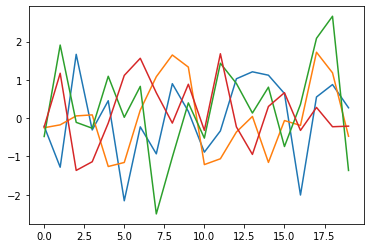

In [ ]:
#cuda
plot_ts(TSTensor(t.to('cuda')))

cpu


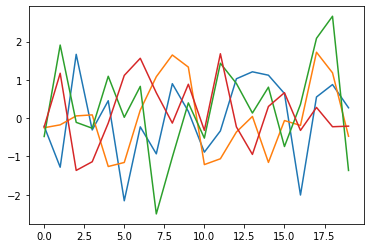

In [ ]:
plot_ts(ts_tensor)

TSTensor show
cpu


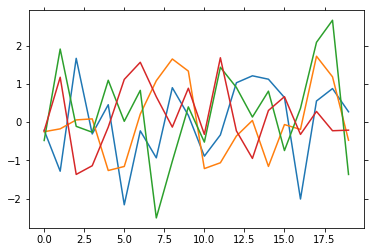

In [ ]:
ts_tensor.show()

cpu


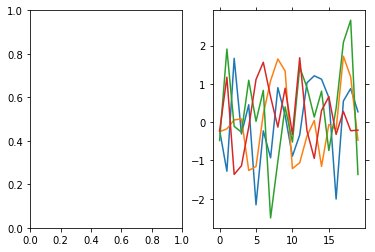

In [ ]:
_, axes = plt.subplots(1,2)
plot_ts(ts_tensor,axes[1]);

TSTensor show
cpu


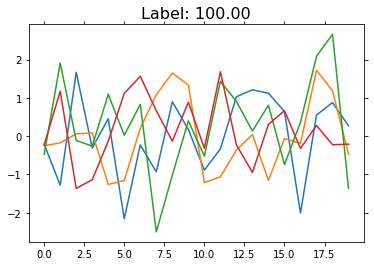

In [ ]:
ctx=ts_tensor.show();
TensorFloat(100.).show(ctx=ctx)

TSTensor show
cpu
TSTensor show
cpu
TSTensor show
cpu
TSTensor show
cpu
TSTensor show
cpu
TSTensor show
cpu
TSTensor show
cpu
TSTensor show
cpu
TSTensor show
cpu


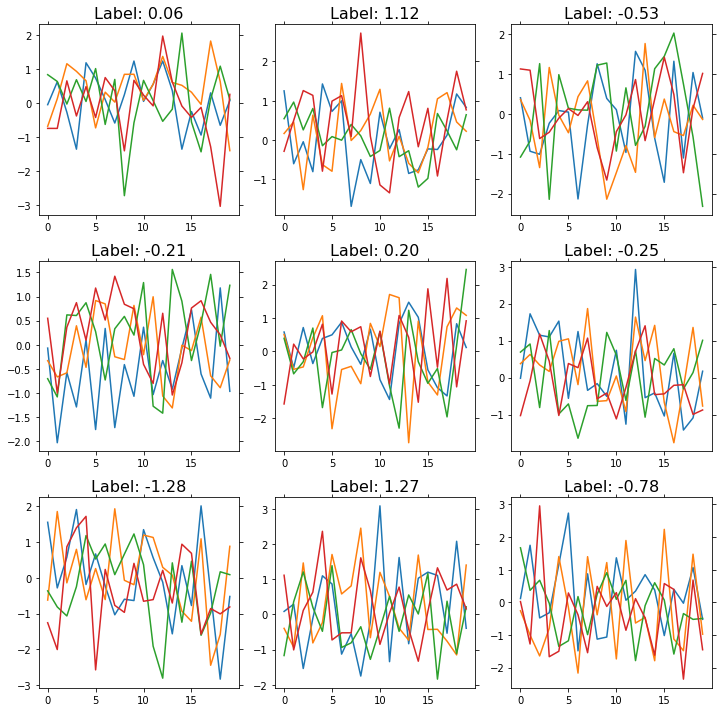

In [ ]:
_, axes = plt.subplots(3,3, figsize=(10,10))
for i,ax in enumerate(axes.flatten()):
    TSTensor(xs_batch[i]).show(ax)
    TensorFloat(ys_batch[i]).show(ax)
plt.tight_layout()

### TSInt

In [ ]:
t = torch.randint(-5, +5, (1,10))

In [ ]:
np.random.normal()

0.6509477584241457

In [ ]:
def get_random_diffs(size):
    '''create a random difference time series, discrete values'''
    t = np.random.normal(loc=0, scale=2.0, size=size)
    return torch.tensor(t, dtype=int)

In [ ]:
size=(1,10)
t = get_random_diffs(size)

In [ ]:
t

tensor([[-2, -1, -1,  0,  2, -1, -1,  4,  1, -1]])

<BarContainer object of 10 artists>

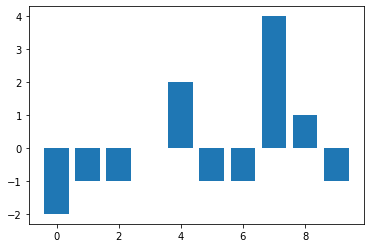

In [ ]:
plt.bar(np.arange(10), t.numpy().squeeze())

In [ ]:
t.numpy().squeeze()

array([-2, -1, -1,  0,  2, -1, -1,  4,  1, -1])

In [ ]:
#export
def plot_ts_int(x, ax=None, title=None, **kwargs):
    '''
    plot a 2D tensor representing a timeseries
    '''
    x = x.clone().to('cpu')
    print(x.device)
    if ax is None:
#             plt.plot(x.data.transpose_(0, 1))
        plt.bar(np.arange(x.shape[-1]), x.transpose_(0, 1).squeeze())

        plt.title(title)
        plt.show()
    else:
        ax.bar(np.arange(x.shape[-1]), x.transpose_(0, 1).squeeze())
        ax.title.set_text(title)
        ax.tick_params(
            axis='both',
            which='both',
            bottom='off',
            top='off',
            labelbottom='off',
            right='off',
            left='off',
            labelleft='off')
        return ax


In [ ]:
#export
class TSIntTensor(TensorBase): 
    '''tensor wrapper for timeseries (channels, seq_length) with discrete values'''
#     def show(self, ctx=None):
#         print('TSTensor show')
#         return show_ts(self.to('cpu'))
    
    def show(self, ctx=None):
        print('TSTensor show')
        if ctx is None:
            fig, axes = plt.subplots()
            ctx=axes
        
        plot_ts_int(self, ax=ctx);
        return ctx

In [ ]:
ts_int = TSIntTensor(t)

<BarContainer object of 10 artists>

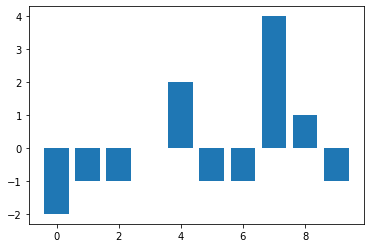

In [ ]:
plt.bar(np.arange(ts_int.shape[-1]), ts_int.transpose(0,1).squeeze())

TSTensor show
cpu


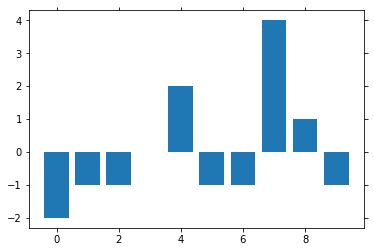

In [ ]:
ts_int.show()

TSTensor show
cpu


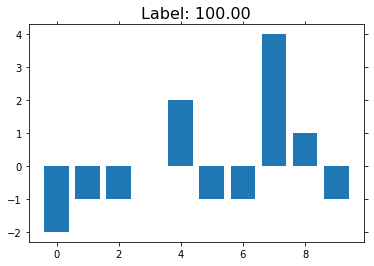

In [ ]:
ctx=ts_int.show();
TensorFloat(100.).show(ctx=ctx)